In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import chess
import numpy as np

In [33]:
from endgames_helper import get_pawn_start, get_rook_start, get_two_bishops_start, get_board
from IPython.display import display, HTML, clear_output
import time

In [36]:
def play_game(board, pi, V, sleep = 0.3):
    max_value = max(V.values())
    state = ' '.join(board.fen().split(' ')[:2])
    while not board.is_checkmate():
        value = V[state]
        clear_output(wait=True)
        display(board)
        print('State Value: {}. Mate in {}'.format(value, 1 + int((max_value-abs(value)+0.5)/2)))
        time.sleep(sleep)
        state = ' '.join(board.fen().split(' ')[:2])
        next_move = pi[state]
        board.push_uci(next_move)
    clear_output(wait=True)
    display(board)

# Rook engame

In [23]:
# Policy Iteration
pi_rook = np.load('PI_rook_endgame.npy').item()
V_rook = np.load('V_rook_endgame.npy').item()

In [37]:
# Value Iteration
pi_rook = np.load('PI_rook_endgame_value_iter.npy').item()
V_rook = np.load('V_rook_endgame_value_iter.npy').item()

In [38]:
board = get_rook_start()

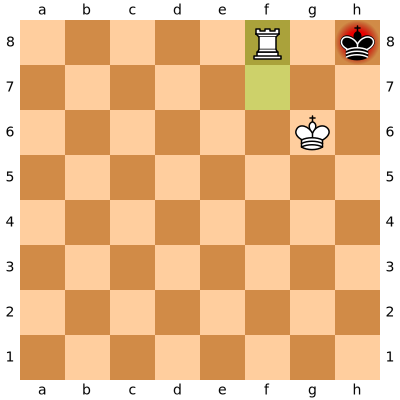

In [39]:
play_game(board, pi_rook, V_rook)

### Worst Starting position

In [44]:
board = get_board('8/1R6/2k5/8/8/8/8/K7 w')

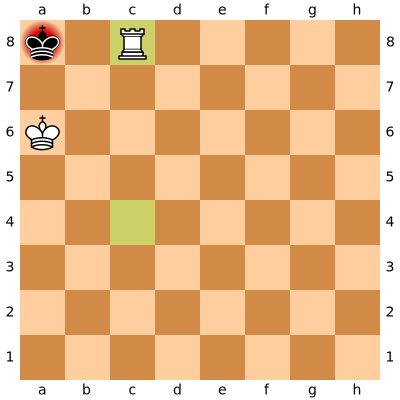

In [45]:
play_game(board, pi_rook, V_rook)

# Pawn endgame

In [9]:
# Policy Iteration
pi_pawn = np.load('PI_pawn_endgame_pol_it.npy').item()
V_pawn = np.load('V_pawn_endgame_pol_it.npy').item()

In [40]:
# Value Iteration
pi_pawn = np.load('PI_pawn_endgame_value_iter.npy').item()
V_pawn = np.load('V_pawn_endgame_value_iter.npy').item()

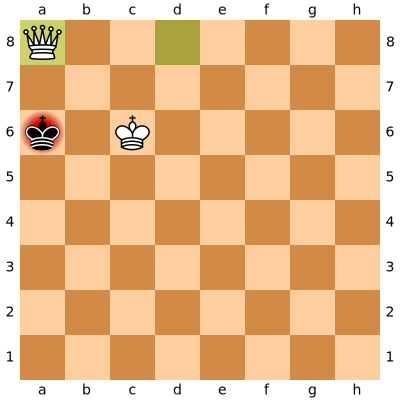

In [41]:
board = get_pawn_start()
play_game(board, pi_pawn, V_pawn, sleep=0.5)

# Two bishops endgame

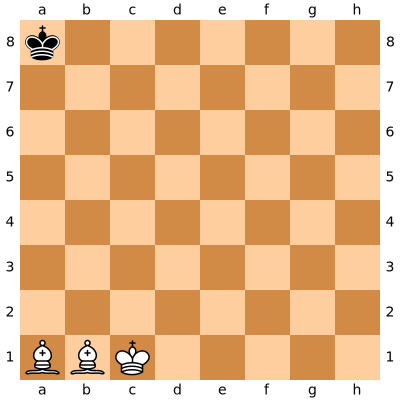

In [46]:
board = get_two_bishops_start()
board

In [47]:
# Value Iteration
pi_pawn = np.load('PI_two_bishops_endgame_value_iter.npy').item()
V_pawn = np.load('V_two_bishops_endgame_value_iter.npy').item()

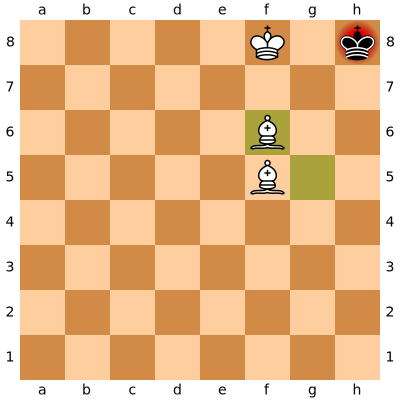

In [48]:
play_game(board, pi_pawn, V_pawn, sleep=0.5)

# Analysis

In [28]:
# Max number of moves to mate
values = np.array(list(V_rook.values()))
min_positive = np.min(values[values>0])
max_number_of_moves = max(values) - min_positive
print(max_number_of_moves)

30.0


In [29]:
worst_states = []
for state, value in V_rook.items():
    if value == min_positive:
        worst_states.append(state)

In [35]:
# board = chess.Board()
# for s in worst_states:
#     board.set_fen(s + ' - - 0 1')
#     print(s)
#     display(board)